In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [52]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [53]:
print(len(X_train))
len(X_test)

60000


10000

In [54]:
X_train[0].shape

(28, 28)

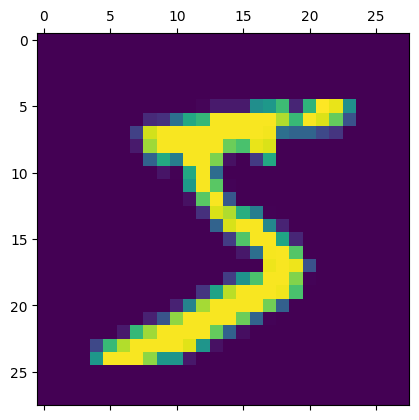

In [55]:
plt.matshow(X_train[0])

In [56]:
X_train=X_train/255
X_test=X_test/255

In [57]:
X_train_flattened = X_train.reshape(len(X_train,),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [58]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),  
    keras.layers.Dense(10,activation = 'sigmoid')     
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.2767 - accuracy: 0.9211
Epoch 2/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.1226 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.0856 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.0667 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.0522 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 2s 877us/step - loss: 0.0429 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.0345 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.0287 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.0240 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 2s 848u

In [60]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 616us/step - loss: 0.0770 - accuracy: 0.9794


[0.07695235311985016, 0.9793999791145325]

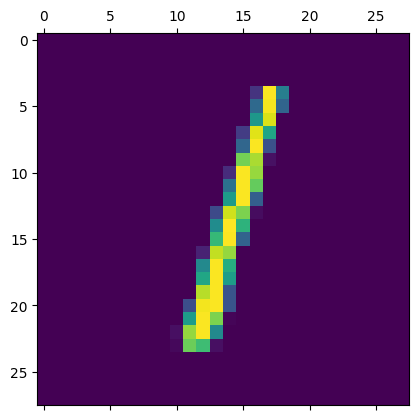

In [61]:
plt.matshow(X_test[2])

In [62]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

313/313 [==============================] - 0s 617us/step


array([3.7407362e-06, 9.9651200e-01, 1.8938476e-01, 5.3190347e-04,
       5.0420016e-03, 1.3390830e-04, 2.3285218e-04, 3.7783813e-02,
       1.2706764e-01, 9.0730820e-05], dtype=float32)

In [63]:
np.argmax(y_predicted[2])
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [64]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

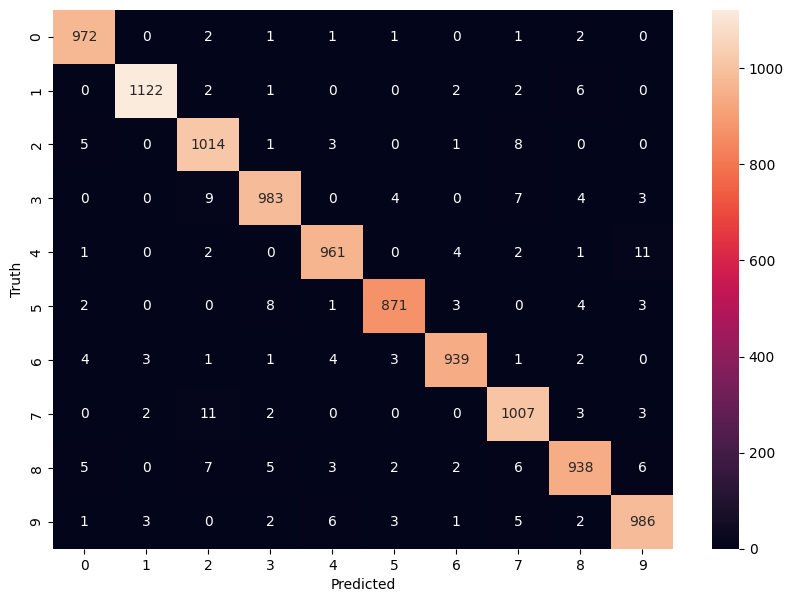

In [65]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')